<a href="https://colab.research.google.com/github/Alphaomegainfinity/Project-4_Car_Price_Predictor/blob/main/car_price_predictor_test7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import and Cleaning Data**

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
import tensorflow as tf
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import MinMaxScaler

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
import numpy as np

In [3]:
# Import our input dataset
car_df = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/Project-4_Car_Price_Predictor/main/Resources/Car%20details%20v3.csv')
car_df.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check shape of dataframe
car_df.shape

(8128, 13)

In [5]:
# Check info of dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# Drop unwanted columns 
car_df.drop(['name', 'torque'], axis=1, inplace=True)
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [7]:
# cleaning engine column

car_df['engine'] = car_df['engine'].str.rsplit(' ', n=1).str.get(0)
car_df.rename(columns={'engine':'engine(CC)'}, inplace=True)
car_df['engine(CC)'] = car_df['engine(CC)'].astype(float)

In [8]:
# converting mileage column to numeric

car_df['mileage'] = car_df['mileage'].str.rsplit(' ', n=1).str.get(0)
car_df.rename(columns={'mileage':'mileage_kmpl'}, inplace=True)
car_df['mileage_kmpl'] = car_df['mileage_kmpl'].astype(float)


In [9]:
# converting max_power column to numeric

car_df['max_power'] = car_df['max_power'].str.rsplit(' ', n=1).str.get(0)
car_df.rename(columns={'max_power':'maxpower_bhp'}, inplace=True)
car_df['maxpower_bhp'] = pd.to_numeric(car_df['maxpower_bhp'], errors='coerce')

In [10]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage_kmpl   7907 non-null   float64
 8   engine(CC)     7907 non-null   float64
 9   maxpower_bhp   7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 698.6+ KB


In [11]:
car_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine(CC),maxpower_bhp,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Owner Type')]

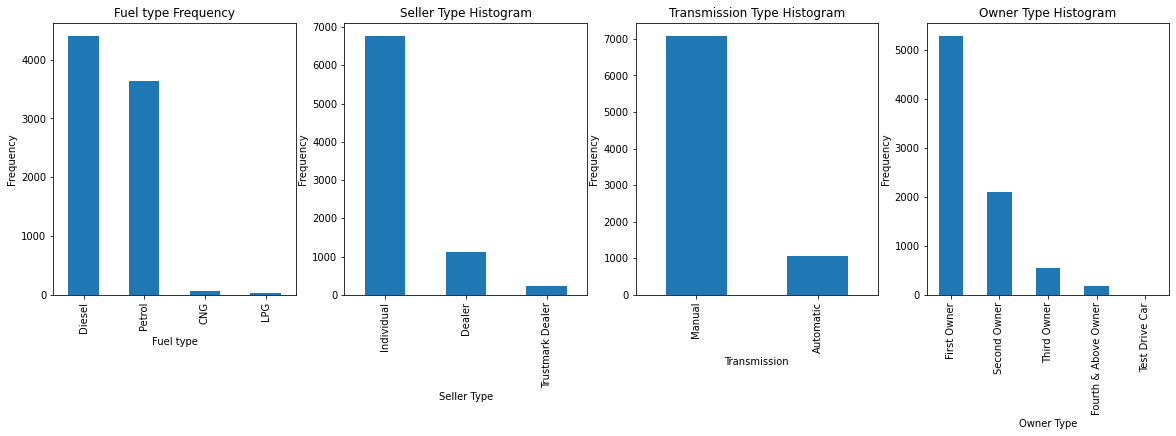

In [12]:
# Visualisation categorical data
%matplotlib inline
plt.figure (figsize = (20, 5))

plt.subplot(1,4,1)
plt1 = car_df.fuel.value_counts().plot (kind ='bar')
plt.title ("Fuel type Frequency")
plt1.set(xlabel = "Fuel type", ylabel = "Frequency")

plt.subplot(1,4,2)
plt2 = car_df.seller_type.value_counts().plot (kind ='bar')
plt.title ("Seller Type Histogram")
plt2.set(xlabel = "Seller Type", ylabel = "Frequency")

plt.subplot(1,4,3)
plt3 = car_df.transmission.value_counts().plot (kind='bar')
plt.title ("Transmission Type Histogram")
plt3.set (xlabel = "Transmission", ylabel = "Frequency")

plt.subplot(1,4,4)
plt4 = car_df.owner.value_counts().plot (kind='bar')
plt.title ('Owner Type Histogram')
plt4.set (xlabel = 'Owner Type', ylabel = 'Frequency')


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Year')]

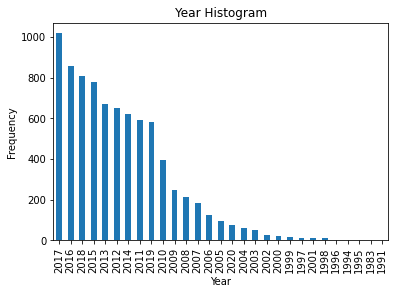

In [13]:
plt5 = car_df.year.value_counts().plot (kind='bar')
plt.title ('Year Histogram')
plt5.set (xlabel = 'Year', ylabel = 'Frequency')

[Text(0, 0.5, 'Average Price')]

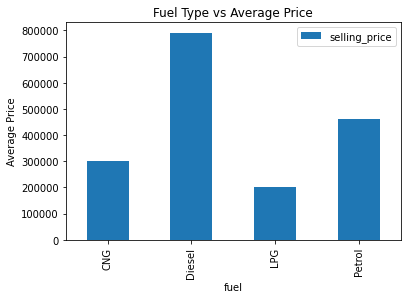

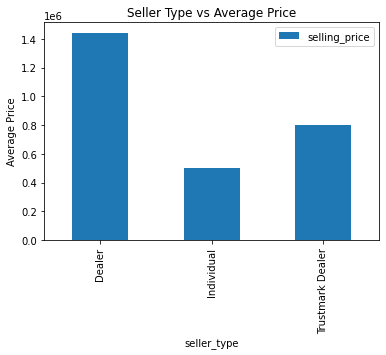

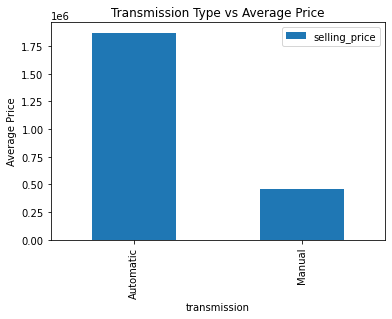

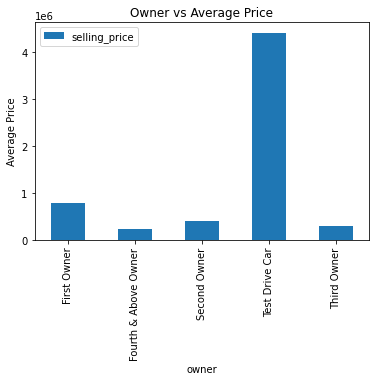

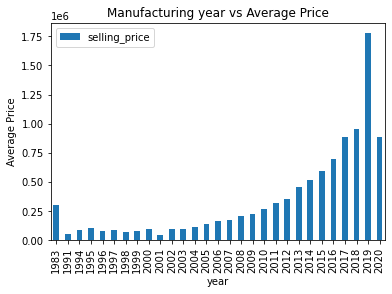

In [14]:
# Visualisation using groupby against average price


fuel_df = pd.DataFrame(car_df.groupby(['fuel'])['selling_price'].mean()).plot (kind = 'bar')
plt.title ("Fuel Type vs Average Price")
fuel_df.set (ylabel = 'Average Price')

seller_type_df = pd.DataFrame(car_df.groupby(['seller_type'])['selling_price'].mean()).plot (kind = 'bar')
plt.title ("Seller Type vs Average Price")
seller_type_df.set (ylabel = 'Average Price')

transmission_df = pd.DataFrame(car_df.groupby(['transmission'])['selling_price'].mean()).plot (kind = 'bar')
plt.title ("Transmission Type vs Average Price")
transmission_df.set (ylabel = 'Average Price')

owner_df = pd.DataFrame(car_df.groupby(['owner'])['selling_price'].mean()).plot (kind = 'bar')
plt.title ("Owner vs Average Price")
owner_df.set (ylabel = 'Average Price')

year_df = pd.DataFrame(car_df.groupby(['year'])['selling_price'].mean()).plot (kind = 'bar')
plt.title ("Manufacturing year vs Average Price")
year_df.set (ylabel = 'Average Price')

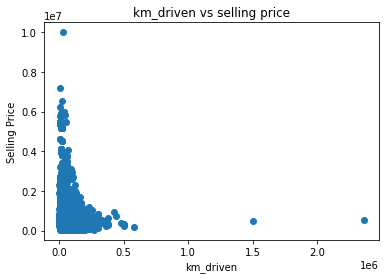

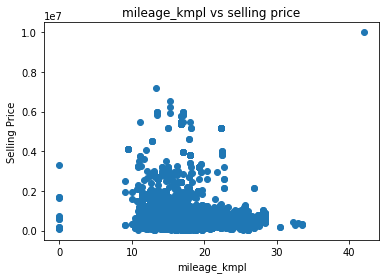

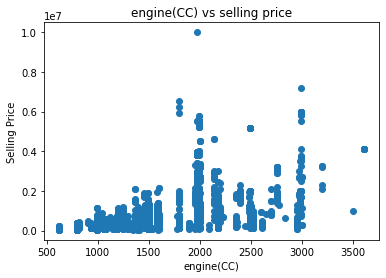

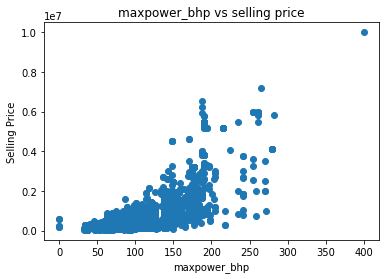

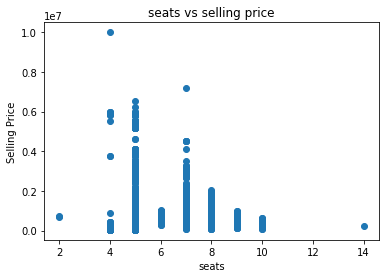

In [15]:
# Visualisation numerical data

names = ['km_driven', 'mileage_kmpl',	'engine(CC)',	'maxpower_bhp',	'seats']

for i in names:
  plt.scatter(car_df[i], car_df['selling_price'])
  plt.title (i + ' vs selling price')
  plt.ylabel ("Selling Price")
  plt.xlabel (i)
  plt.show()

In [16]:
# Correlation Matrix to make all scatter plots at once
# Create a grid of column pairs with scatter plots for non-diagonal(upper portion)
# sns.PairGrid(car_df).map_upper(plt.scatter)

#### Mileage kmpl and km driven seem to have no relationship with the selling price

In [17]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

classifications_to_replace = car_df[car_df['year'].isin(car_df['year'].value_counts()[car_df['year'].value_counts()<150].index)]['year']

# Replace in dataframe
for cls in classifications_to_replace:
    car_df['year'] = car_df['year'].replace(cls,"Other")
    
# Check to make sure binning was successful
car_df['year'].value_counts()

car_df ['year'] = car_df ['year'].astype(str)

In [18]:
engine_bin = [1,2,3,4]
car_df['engine(CC)_binning'] = pd.cut(car_df['engine(CC)'], [1000, 1999, 2999, 3999, 4000], labels = engine_bin)
car_df.head(200)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine(CC),maxpower_bhp,seats,engine(CC)_binning
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,1
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,1
2,Other,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,1
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,1
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
195,Other,65000,86000,Petrol,Individual,Manual,First Owner,15.30,1341.0,83.00,5.0,1
196,Other,720000,5000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.86,5.0,1
197,2017,800000,37000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.50,5.0,1
198,2019,520000,14000,Petrol,Individual,Manual,First Owner,20.30,1199.0,84.00,5.0,1


In [19]:
car_df['seats'] = car_df['seats'].astype(str)
car_df['engine(CC)_binning'] = car_df['engine(CC)_binning'].astype(str)

In [20]:
car_df.dropna(inplace=True)

In [21]:
car_df = pd.get_dummies(car_df)
car_df.head()

,selling_price,km_driven,mileage_kmpl,engine(CC),maxpower_bhp,year_2007,year_2008,year_2009,year_2010,year_2011,...,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,engine(CC)_binning_1,engine(CC)_binning_2,engine(CC)_binning_3,engine(CC)_binning_nan
0,450000,145500,23.40,1248.0,74.00,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,370000,120000,21.14,1498.0,103.52,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,158000,140000,17.70,1497.0,78.00,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,225000,127000,23.00,1396.0,90.00,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,130000,120000,16.10,1298.0,88.20,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [22]:
list(car_df.columns.values)

['selling_price',
 'km_driven',
 'mileage_kmpl',
 'engine(CC)',
 'maxpower_bhp',
 'year_2007',
 'year_2008',
 'year_2009',
 'year_2010',
 'year_2011',
 'year_2012',
 'year_2013',
 'year_2014',
 'year_2015',
 'year_2016',
 'year_2017',
 'year_2018',
 'year_2019',
 'year_Other',
 'fuel_CNG',
 'fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Automatic',
 'transmission_Manual',
 'owner_First Owner',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner',
 'seats_10.0',
 'seats_14.0',
 'seats_2.0',
 'seats_4.0',
 'seats_5.0',
 'seats_6.0',
 'seats_7.0',
 'seats_8.0',
 'seats_9.0',
 'engine(CC)_binning_1',
 'engine(CC)_binning_2',
 'engine(CC)_binning_3',
 'engine(CC)_binning_nan']

In [23]:
#'mileage_kmpl', 'engine(CC)', 'maxpower_bhp', 'year_2007', 'year_2008', 'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014', 
             #'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019', 'year_Other',  'owner_First Owner', 'owner_Fourth & Above Owner', 
             # 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seller_type_Dealer',
             # 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'transmission_Automatic', 'transmission_Manual', 'seats_10.0', 'seats_14.0', 'seats_2.0', 'seats_4.0', 'seats_5.0', 'seats_6.0', 'seats_7.0',
              # 'seats_8.0', 'seats_9.0', 

In [24]:
# Drop further unwanted columns
car_df.drop(['engine(CC)_binning_1', 'engine(CC)_binning_2', 'engine(CC)_binning_3', 'engine(CC)_binning_nan'], axis=1, inplace=True)

## **Compile, Train and Evaluate the Model**

In [25]:
# Split our preprocessed data into our features and target arrays

y = car_df["selling_price"]
X = car_df.drop(["selling_price"], axis=1)

### *Which Model will be used*

We can't use the Logistic Regresssion Model because our target value is price and it is not a binary valueable data

[4.11542407e-01 1.53759751e-01 9.90789157e-02 1.42531118e-01
 3.38225761e-03 4.23306232e-03 3.96683478e-03 4.72214139e-03
 6.46147734e-03 7.07620401e-03 8.75493918e-03 7.01127252e-03
 7.54113665e-03 1.05722662e-02 9.00254749e-03 7.95557887e-03
 7.41520453e-03 4.47258252e-03 1.38034247e-03 6.58853219e-03
 1.03939926e-03 6.21319464e-03 6.79608625e-03 6.86664276e-03
 6.88294714e-03 4.56764897e-03 4.33637384e-03 1.00115531e-02
 4.24345338e-03 1.13217946e-02 1.60351914e-04 7.13700452e-03
 8.53516369e-04 3.51927999e-05 1.03929841e-04 1.55293418e-03
 6.82099338e-03 1.49381488e-03 6.15082849e-03 4.12343526e-03
 1.84033185e-03]


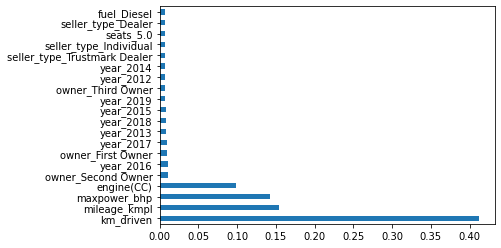

In [26]:
# Checking which feature is important to the target:
important_feature = ExtraTreesClassifier()
important_feature.fit(X,y)
print(important_feature.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(important_feature.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [27]:
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42) 

In [28]:
# Create a StandardScaler instances
scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Checking the number of feature:

number_input_feature = X_train.shape[1]
number_input_feature

41

In [30]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()    

In [31]:

data = [X_train_scaled, X_test_scaled, y_train, y_test]

test_model(LinearRegression(), data)
test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.7175961206453741
Test Score: -1.4793172609303965e+21

Model: KNeighborsRegressor
Train score: 0.9412982328171307
Test Score: 0.9391421057332895

Model: RandomForestRegressor
Train score: 0.9923935443592605
Test Score: 0.9737395811294922

Model: ExtraTreesRegressor
Train score: 0.9996080432838397
Test Score: 0.9771853708622494

Model: AdaBoostRegressor
Train score: 0.7951692502478109
Test Score: 0.819599235140128

Model: SVR
Train score: -0.058133227862211534
Test Score: -0.05482735791061266



In [32]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   selling_price                 7906 non-null   int64  
 1   km_driven                     7906 non-null   int64  
 2   mileage_kmpl                  7906 non-null   float64
 3   engine(CC)                    7906 non-null   float64
 4   maxpower_bhp                  7906 non-null   float64
 5   year_2007                     7906 non-null   uint8  
 6   year_2008                     7906 non-null   uint8  
 7   year_2009                     7906 non-null   uint8  
 8   year_2010                     7906 non-null   uint8  
 9   year_2011                     7906 non-null   uint8  
 10  year_2012                     7906 non-null   uint8  
 11  year_2013                     7906 non-null   uint8  
 12  year_2014                     7906 non-null   uint8  
 13  yea

In [33]:
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=200,
                    batch_size=50,
                    verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              42000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 dense_3 (Dense)             (None, 1)                 251       
                                                                 
Total params: 668,001
Trainable params: 668,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
119/119 [==============================] - 3s 19ms/step - loss: 844685443072.0000 - mae: 482435.3750 - val_loss: 734895276032.0000 - val_mae: 386434.8125
Epoch 2/200
119/

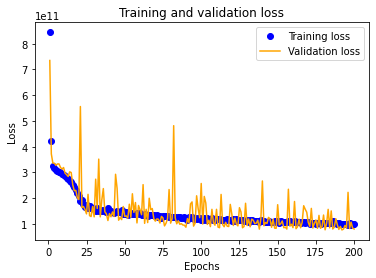

In [34]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

62/62 [==============================] - 0s 4ms/step


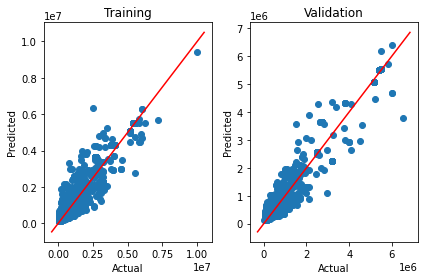

In [35]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [36]:

# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

186/186 [==============================] - 1s 5ms/step
188871.31966025048
185530.70080930702


In [37]:


# Insert the dropout layer
model = Sequential()
model.add(Dense(1000, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              42000     
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_6 (Dense)             (None, 250)               125250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [38]:
# Test seven with seat data added in seems to be almost as accurate as test five which does not have seat data.